In [1]:
from keras_visualizer import visualizer 
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.


In [2]:
#Import the data
#Data source: https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f
#Code source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
# The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based 
# on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of 
# these instances from a larger database. In particular, all patients here are females at least 21 years old of 
# Pima Indian heritage.

#Data variable names are:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [3]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model

In [8]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#print model summary
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#Attempt to visualize the model. Note: activation function names may not be exact. Otherwise, the illustration is good.
visualizer(model, format='png', view=True)

In [12]:
# Fit the model; set verbose to 1 or 2 to see the training metrics in each epoch
history = model.fit(X, Y, validation_split=0.40, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


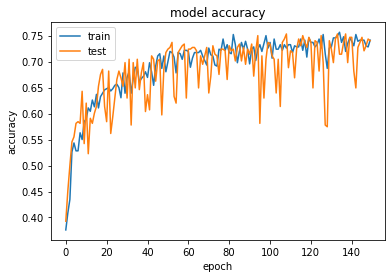

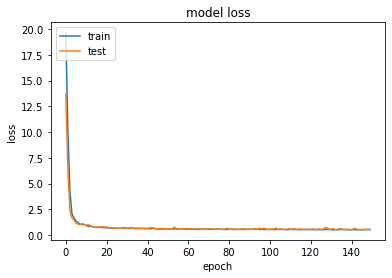

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()